## Stock Price Prediction using Machine Learning in Python
    Applying Linear Regression and Support Vector Machine Algorithm

In [64]:
import numpy as np # perform large mathematical computations
import pandas as pd # load the dataset
import matplotlib.pyplot as plt # used to draw visualizations.
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier # algorithms which helps us to achieve high accuracy on predictions.
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [65]:
# Importing and reading the RELIANCE dataset from Kaggle

df = pd.read_csv('RELIANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [66]:
# Dimension of the dataset
df.shape

(5075, 15)

In [67]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5.075000e+03,5.075000e+03,2.225000e+03,4.561000e+03,4561.000000
mean,965.972099,967.397271,981.117429,952.283685,966.024808,966.214729,966.761762,5.130275e+06,4.939702e+14,1.220797e+05,2.163814e+06,0.441044
std,541.288654,542.662284,552.104362,530.774975,541.060224,541.236031,541.271968,4.155610e+06,5.184849e+14,9.573483e+04,1.776589e+06,0.144237
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,550.175000,554.000000,561.875000,545.000000,551.400000,551.225000,551.505000,2.778337e+06,2.139267e+14,6.981400e+04,1.161475e+06,0.329900
50%,919.950000,920.100000,931.000000,909.300000,919.350000,920.000000,920.170000,4.085150e+06,3.514797e+14,9.556100e+04,1.743995e+06,0.457500
75%,1138.900000,1142.775000,1160.925000,1118.200000,1137.750000,1139.325000,1140.035000,6.215759e+06,6.087882e+14,1.417590e+05,2.587743e+06,0.548300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,8.835030e+15,1.194059e+06,3.495888e+07,0.978300


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5075 non-null   object 
 1   Symbol              5075 non-null   object 
 2   Series              5075 non-null   object 
 3   Prev Close          5075 non-null   float64
 4   Open                5075 non-null   float64
 5   High                5075 non-null   float64
 6   Low                 5075 non-null   float64
 7   Last                5075 non-null   float64
 8   Close               5075 non-null   float64
 9   VWAP                5075 non-null   float64
 10  Volume              5075 non-null   int64  
 11  Turnover            5075 non-null   float64
 12  Trades              2225 non-null   float64
 13  Deliverable Volume  4561 non-null   float64
 14  %Deliverble         4561 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 594.9

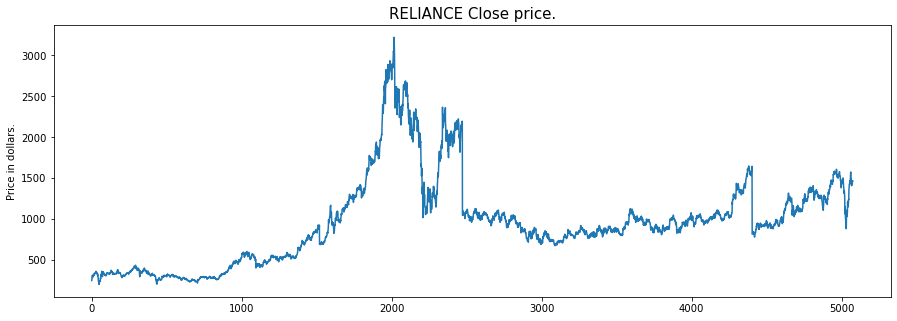

In [69]:
# Plotting the trend of stock prices 
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('RELIANCE Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [70]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [71]:
df[df['Close'] == df['Last']].shape


(67, 15)

In [72]:
df = df.drop(['Last'], axis=1)


In [73]:
df.isnull().sum()


Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [74]:
df.dropna()
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1431.55,1442.31,17458503,2.518059e+15,388907.0,4083814.0,0.2339
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1424.05,1428.70,15330793,2.190317e+15,341795.0,7437964.0,0.4852
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1445.55,1430.20,16460764,2.354223e+15,348477.0,6524302.0,0.3964
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1472.25,1467.50,18519252,2.717698e+15,405603.0,8377100.0,0.4523


In [75]:
df.isnull().sum()


Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

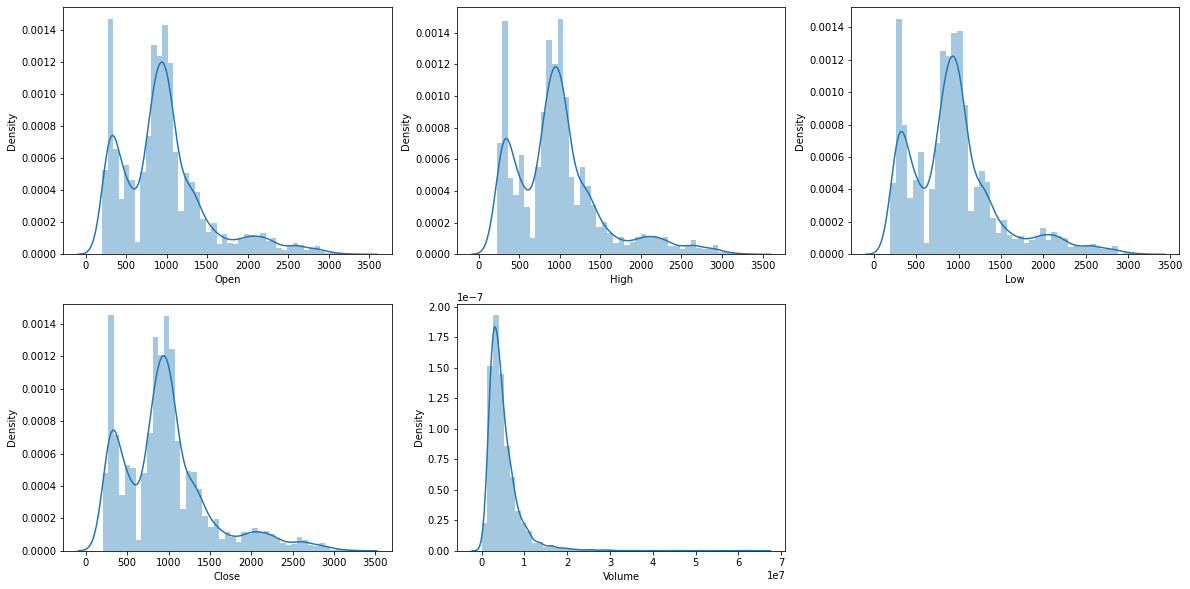

In [76]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


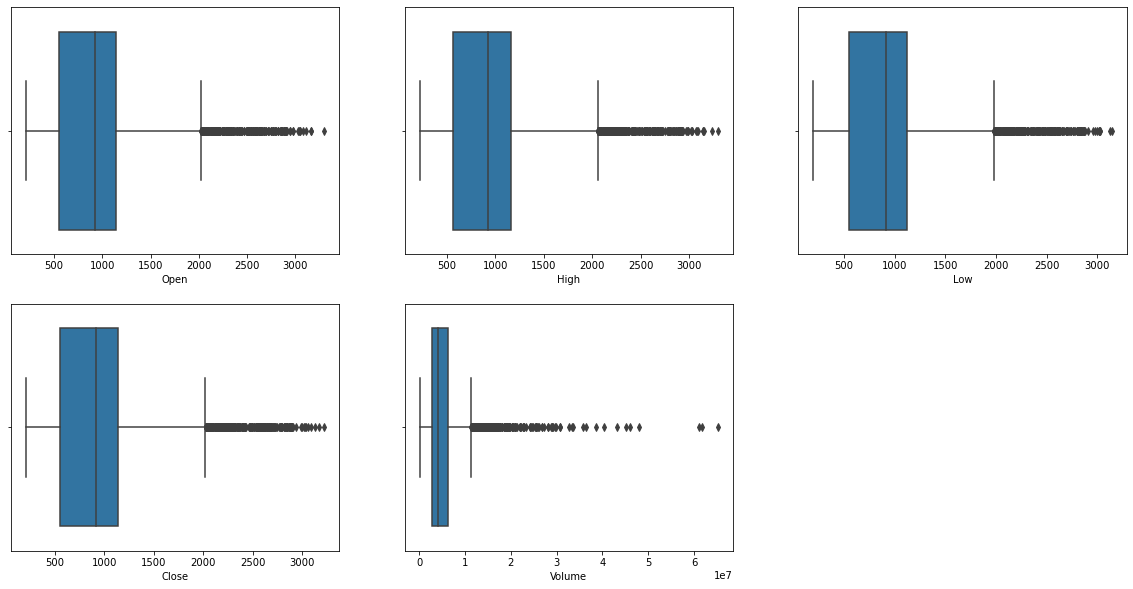

In [77]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [78]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day,month,year
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN,1,2000,3
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN,1,2000,4
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN,1,2000,5
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN,1,2000,6
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN,1,2000,7


In [79]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day,month,year,is_quarter_end
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN,1,2000,3,0
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN,1,2000,4,0
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN,1,2000,5,0
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN,1,2000,6,0
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN,1,2000,7,0


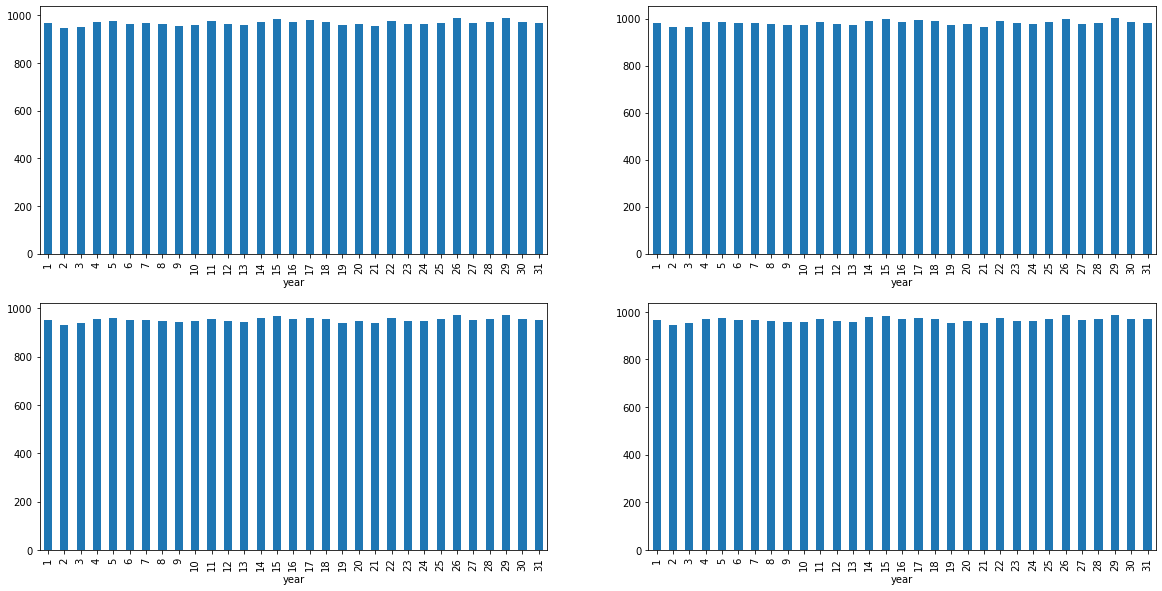

In [80]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [81]:
df.groupby('is_quarter_end').mean()


,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day,month,year
is_quarter_end,,,,,,,,,,,,,,
0,951.385976,952.505345,966.649610,936.619670,951.147628,951.593204,5.262521e+06,5.004883e+14,121072.463250,2.144236e+06,0.431298,6.394294,2009.520420,15.820420
1,993.806934,995.815673,1008.726504,982.175473,994.967421,995.708063,4.877909e+06,4.815318e+14,124092.843666,2.203885e+06,0.460993,6.519771,2009.962178,15.766762


In [82]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


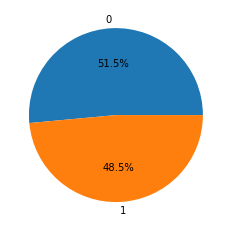

In [83]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


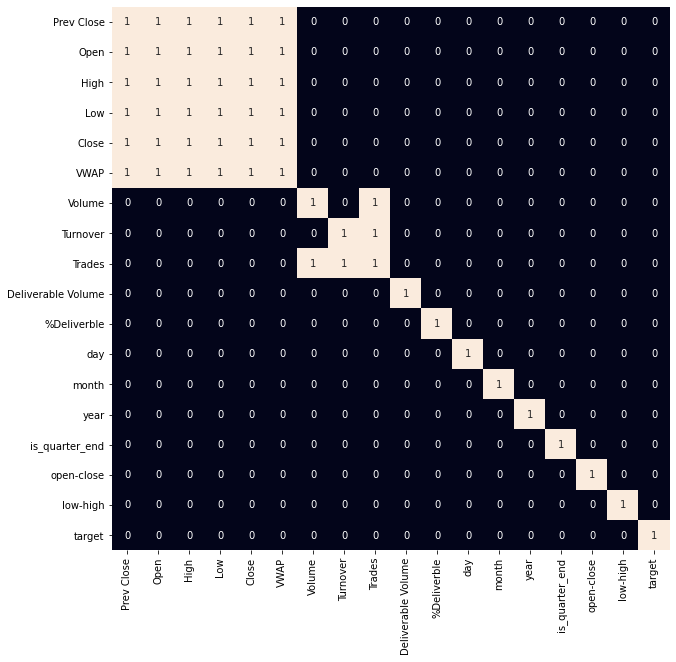

In [84]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [85]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(4567, 3) (508, 3)


In [86]:
models = [LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5108442584116
Validation Accuracy :  0.4792751736111111

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5123944254648966
Validation Accuracy :  0.4777483258928571

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy 

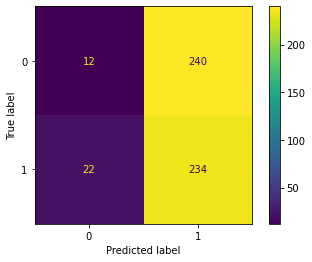

In [87]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()
